In [1]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
data = pd.read_pickle('Downloads/swan_imputed_data.pkl')

In [4]:
data = data.drop(columns=['missingAM', 'missingPM'])

In [5]:
from sklearn.model_selection import train_test_split
tr_start,tr_end = '1977-01-01','1999-12-31'  #missing values before this, might affect predictions, they DO AFFECT the trend
te_start,te_end = '2000-01-01','2010-12-26'
train = data['NumberAM'][tr_start:tr_end].dropna()
test = data['NumberAM'][te_start:te_end].dropna()

#train, test = train_test_split(data, test_size=0.2, shuffle=False)

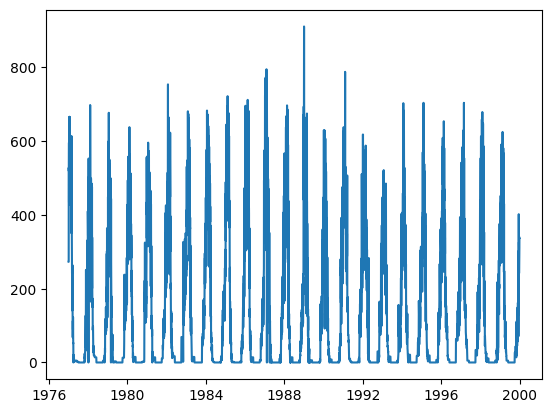

In [6]:
plt.plot(train)

In [7]:
max_vals_am = data \
    .resample('1y') \
    .NumberAM \
    .agg([max])

max_vals_pm = data \
    .resample('1y') \
    .NumberPM \
    .agg([max])

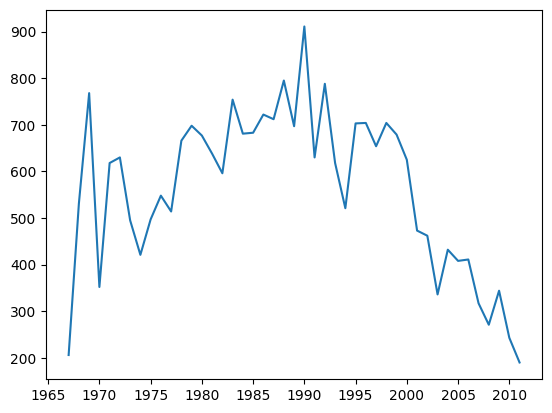

In [8]:
plt.plot(max_vals_am.index, max_vals_am['max'])
#plt.plot(max_vals_pm.index, max_vals_pm['max'])



<AxesSubplot:>

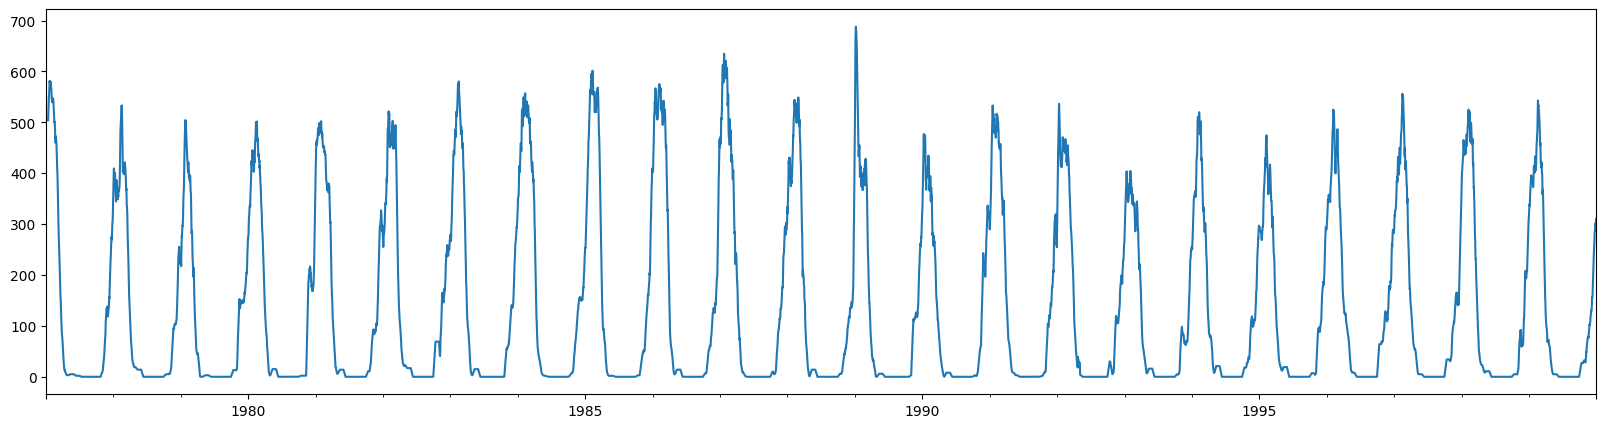

In [9]:
train.rolling(12).mean().plot(figsize=(20,5))

<AxesSubplot:>

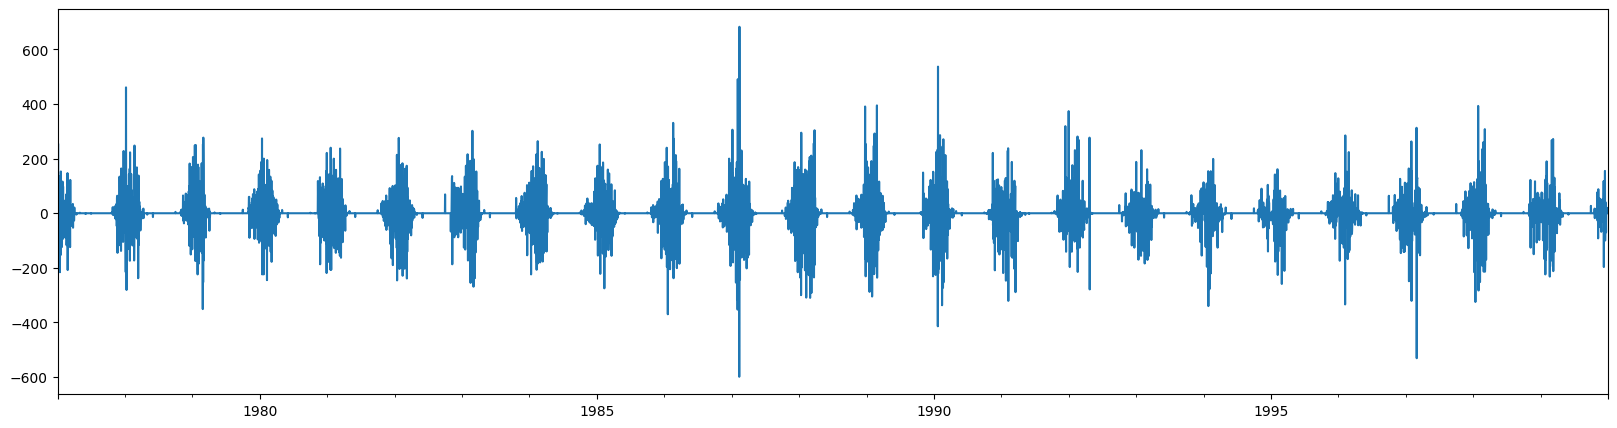

In [10]:
train.diff().plot(figsize=(20,5))

In [11]:
train.head()

1977-01-01    273
1977-01-02    273
1977-01-03    528
1977-01-04    524
1977-01-05    519
Name: NumberAM, dtype: int64

In [12]:
model=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/liiva/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/liiva/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50396D+00    |proj g|=  8.15215D-02


 This problem is unconstrained.



At iterate    5    f=  5.44729D+00    |proj g|=  1.77820D-02

At iterate   10    f=  5.38543D+00    |proj g|=  4.41103D-02

At iterate   15    f=  5.34003D+00    |proj g|=  3.01695D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   4.437D-06   5.340D+00
  F =   5.3400331802478807     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


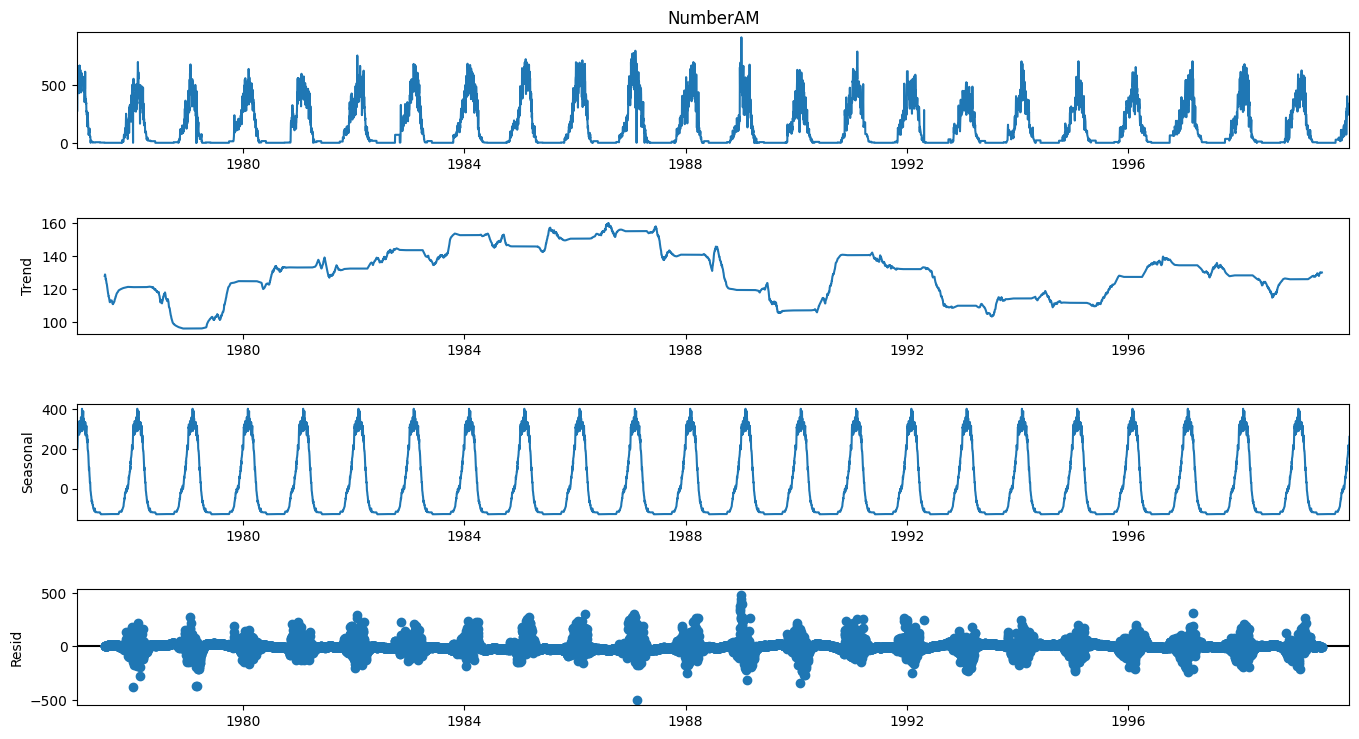

In [13]:
res = sm.tsa.seasonal_decompose(train, model = 'additive', period = 365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

/home/liiva/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


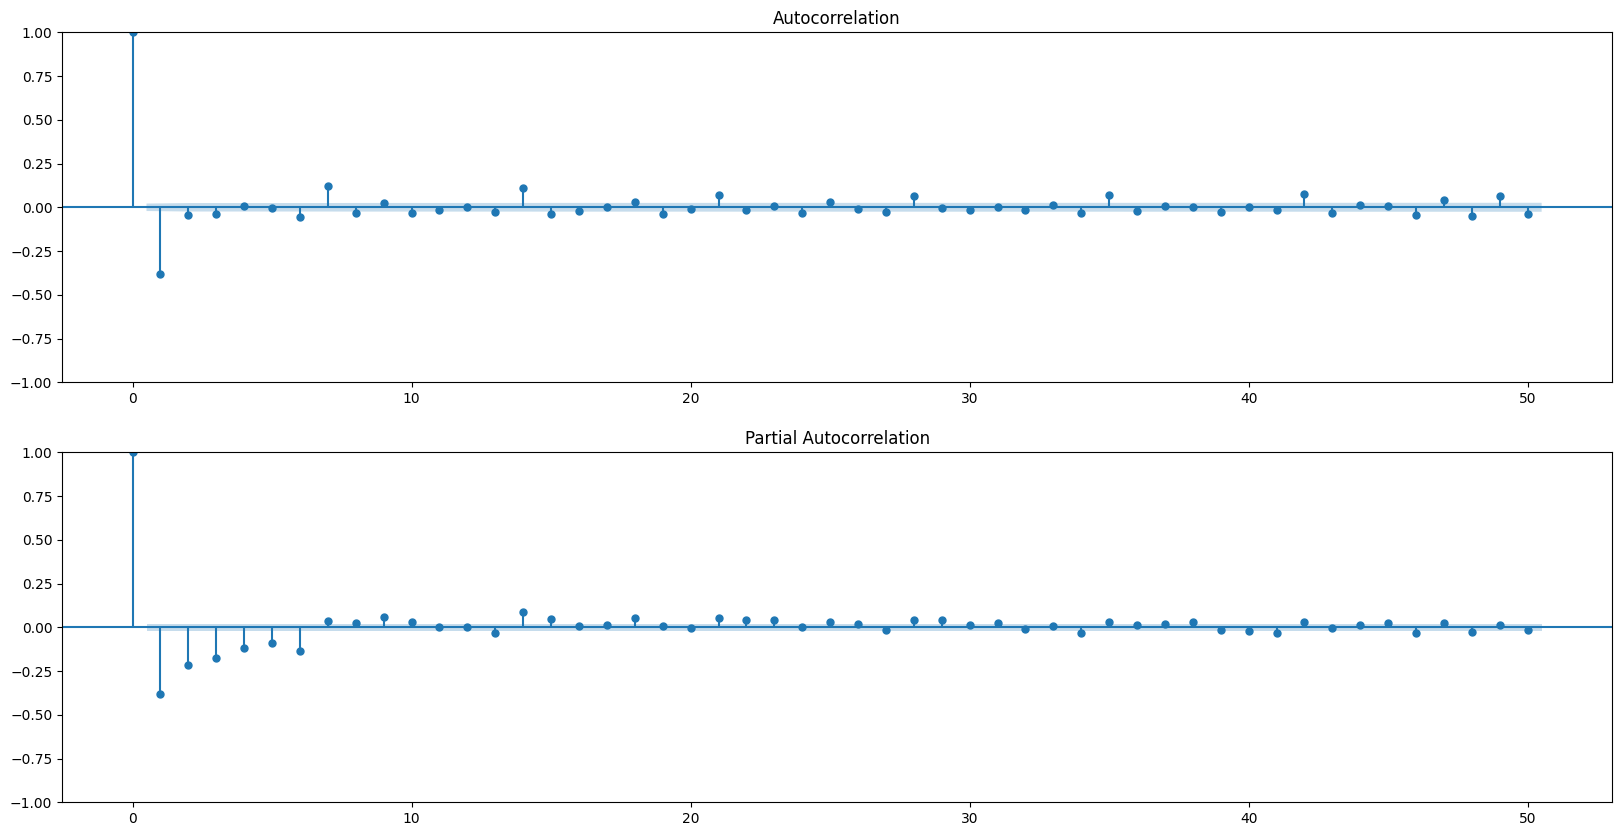

In [14]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(train.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [ ]:
model=sm.tsa.statespace.SARIMAX(train,order=(7, 1, 7),seasonal_order=(1,2,1,12))
results=model.fit()

/home/liiva/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/liiva/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85296D+00    |proj g|=  4.20676D-02


 This problem is unconstrained.



At iterate    5    f=  5.82779D+00    |proj g|=  4.99859D-02

At iterate   10    f=  5.81086D+00    |proj g|=  2.81290D-02

At iterate   15    f=  5.79347D+00    |proj g|=  3.50842D-02

At iterate   20    f=  5.78434D+00    |proj g|=  2.73003D-01

At iterate   25    f=  5.75535D+00    |proj g|=  4.83978D-01


In [ ]:
from sklearn.metrics import mean_squared_error
pred = results.predict(tr_end,te_end)[1:]
print('SARIMA model MSE:{}'.format(mean_squared_error(test,pred)))


In [ ]:
pd.DataFrame({'test':test,'pred':pred}).plot();plt.show()